In [1]:
# Install kagglehub (only once)
!pip install kagglehub

# Import libraries
import kagglehub
import os

# Download the dataset
dataset_path = kagglehub.dataset_download("puneet6060/intel-image-classification")

# Construct the full path to the training set
train_path = os.path.join(dataset_path, "seg_train", "seg_train")

# List categories (folder names in training set)
categories = os.listdir(train_path)
print(categories)


['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']


In [2]:
img_path = []
labels=[]
for category in categories:
    folder_path = os.path.join(train_path, category)  # Corrected path
    for file in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file)
        img_path.append(file_path)
        labels.append(category)

In [3]:
img_path[:5]

['C:\\Users\\DELL\\.cache\\kagglehub\\datasets\\puneet6060\\intel-image-classification\\versions\\2\\seg_train\\seg_train\\buildings\\0.jpg',
 'C:\\Users\\DELL\\.cache\\kagglehub\\datasets\\puneet6060\\intel-image-classification\\versions\\2\\seg_train\\seg_train\\buildings\\10006.jpg',
 'C:\\Users\\DELL\\.cache\\kagglehub\\datasets\\puneet6060\\intel-image-classification\\versions\\2\\seg_train\\seg_train\\buildings\\1001.jpg',
 'C:\\Users\\DELL\\.cache\\kagglehub\\datasets\\puneet6060\\intel-image-classification\\versions\\2\\seg_train\\seg_train\\buildings\\10014.jpg',
 'C:\\Users\\DELL\\.cache\\kagglehub\\datasets\\puneet6060\\intel-image-classification\\versions\\2\\seg_train\\seg_train\\buildings\\10018.jpg']

In [4]:
labels[:5]

['buildings', 'buildings', 'buildings', 'buildings', 'buildings']

In [5]:
len(labels)

14034

In [6]:
label_map={}

for id,category in enumerate(categories):
    label_map.update({category:id})
print(label_map)

{'buildings': 0, 'forest': 1, 'glacier': 2, 'mountain': 3, 'sea': 4, 'street': 5}


In [7]:
label_map1=[]
for i in labels:
    label_map1.append(label_map[i])
label_map1[:5]

[0, 0, 0, 0, 0]

In [8]:
!pip install tensorflow
from tensorflow.keras.preprocessing.image import load_img,img_to_array
import numpy as np

def preprocess_image(path):
    img=load_img(path,target_size=(150,150))
    img_array=img_to_array(img)
    img_array=img_array/255.0
    return img_array

In [9]:
img_path[0]

'C:\\Users\\DELL\\.cache\\kagglehub\\datasets\\puneet6060\\intel-image-classification\\versions\\2\\seg_train\\seg_train\\buildings\\0.jpg'

In [10]:
y=preprocess_image(img_path[0])
y.shape

(150, 150, 3)

In [11]:
X=[]
for i in img_path:
    X.append(preprocess_image(i))

In [12]:
X=np.array(X)
X.shape

(14034, 150, 150, 3)

Text(0.5, 1.0, 'buildings')

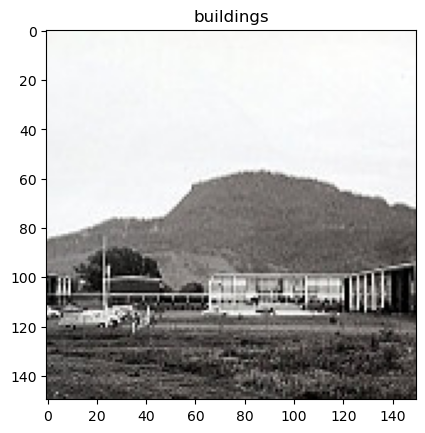

In [31]:
import matplotlib.pyplot as plt
plt.imshow(X[0])
plt.title(labels[0])

In [14]:
len(categories)

6

Build a CNN model

In [15]:
import tensorflow as tf
from tensorflow import keras

model=keras.Sequential([
    keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(150,150,3)), 
    keras.layers.MaxPooling2D((2,2)), 

    keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu'), 
    keras.layers.MaxPooling2D((2,2)),

    keras.layers.Flatten(),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dense(len(categories),activation='softmax')
])

C:\Users\DELL\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
type(X)

numpy.ndarray

In [17]:
type(label_map1)

list

In [18]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [19]:
model.fit(X,np.array(label_map1),epochs=5)

Epoch 1/5
439/439 ━━━━━━━━━━━━━━━━━━━━ 58s 131ms/step - accuracy: 0.5692 - loss: 1.1711
Epoch 2/5
439/439 ━━━━━━━━━━━━━━━━━━━━ 56s 128ms/step - accuracy: 0.8066 - loss: 0.5440
Epoch 3/5
439/439 ━━━━━━━━━━━━━━━━━━━━ 56s 128ms/step - accuracy: 0.8979 - loss: 0.3037
Epoch 4/5
439/439 ━━━━━━━━━━━━━━━━━━━━ 56s 128ms/step - accuracy: 0.9564 - loss: 0.1380
Epoch 5/5
439/439 ━━━━━━━━━━━━━━━━━━━━ 56s 128ms/step - accuracy: 0.9812 - loss: 0.0709


In [20]:
# Construct the full path to the testing set
test_path = os.path.join(dataset_path, "seg_test", "seg_test")

# List categories (folder names in training set)
categories1 = os.listdir(test_path)
print(categories1)
print(test_path)

['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']
C:\Users\DELL\.cache\kagglehub\datasets\puneet6060\intel-image-classification\versions\2\seg_test\seg_test


In [36]:
img_path1 = []
labels1=[]
for category in categories1:
    folder_path = os.path.join(test_path, category)  
    for file in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file)
        img_path1.append(file_path)
        labels1.append(category)

In [37]:
img_path1[:5]

['C:\\Users\\DELL\\.cache\\kagglehub\\datasets\\puneet6060\\intel-image-classification\\versions\\2\\seg_test\\seg_test\\buildings\\20057.jpg',
 'C:\\Users\\DELL\\.cache\\kagglehub\\datasets\\puneet6060\\intel-image-classification\\versions\\2\\seg_test\\seg_test\\buildings\\20060.jpg',
 'C:\\Users\\DELL\\.cache\\kagglehub\\datasets\\puneet6060\\intel-image-classification\\versions\\2\\seg_test\\seg_test\\buildings\\20061.jpg',
 'C:\\Users\\DELL\\.cache\\kagglehub\\datasets\\puneet6060\\intel-image-classification\\versions\\2\\seg_test\\seg_test\\buildings\\20064.jpg',
 'C:\\Users\\DELL\\.cache\\kagglehub\\datasets\\puneet6060\\intel-image-classification\\versions\\2\\seg_test\\seg_test\\buildings\\20073.jpg']

In [38]:
labels1[:5]

['buildings', 'buildings', 'buildings', 'buildings', 'buildings']

In [39]:
len(labels1)

3000

In [40]:
label_map2={}

for id,category in enumerate(categories1):
    label_map2.update({category:id})
print(label_map2)

{'buildings': 0, 'forest': 1, 'glacier': 2, 'mountain': 3, 'sea': 4, 'street': 5}


In [41]:
label_map3=[]
for i in labels1:
    label_map3.append(label_map2[i])
label_map3[:5]

[0, 0, 0, 0, 0]

In [42]:
img_path1[0]

'C:\\Users\\DELL\\.cache\\kagglehub\\datasets\\puneet6060\\intel-image-classification\\versions\\2\\seg_test\\seg_test\\buildings\\20057.jpg'

In [43]:
X1=[]
for i in img_path1:
    X1.append(preprocess_image(i))
X1=np.array(X1)
X1.shape

(3000, 150, 150, 3)

Text(0.5, 1.0, 'buildings')

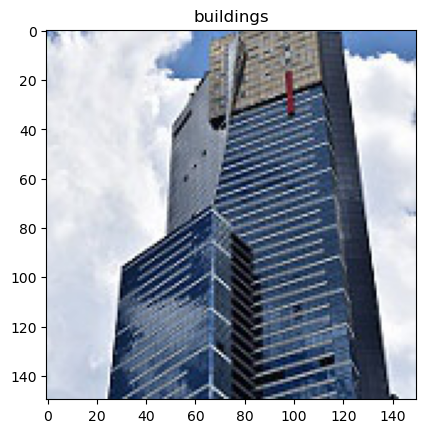

In [44]:
plt.imshow(X1[0])
plt.title(labels1[0])

In [45]:
model.evaluate(X1,np.array(label_map3))

94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.7984 - loss: 0.9259


[0.8987528681755066, 0.7889999747276306]

Prediction with single image

In [52]:
img_path3=r"C:\Users\DELL\Downloads\59ed352f6f5a8a4d41c536028af66aa4.jpg"
y_pred=preprocess_image(img_path3)
y_pred

array([[[0.49019608, 0.43137255, 0.41960785],
        [0.49019608, 0.43137255, 0.41960785],
        [0.49019608, 0.43137255, 0.41960785],
        ...,
        [0.70980394, 0.5647059 , 0.49411765],
        [0.69803923, 0.5529412 , 0.48235294],
        [0.6901961 , 0.54509807, 0.4745098 ]],

       [[0.46666667, 0.42352942, 0.41568628],
        [0.46666667, 0.42352942, 0.41568628],
        [0.4627451 , 0.41960785, 0.4117647 ],
        ...,
        [0.7058824 , 0.56078434, 0.49019608],
        [0.69411767, 0.54901963, 0.47843137],
        [0.7019608 , 0.5568628 , 0.4862745 ]],

       [[0.4509804 , 0.4117647 , 0.41568628],
        [0.4509804 , 0.4117647 , 0.41568628],
        [0.4509804 , 0.4117647 , 0.41568628],
        ...,
        [0.6666667 , 0.5568628 , 0.5019608 ],
        [0.6862745 , 0.5647059 , 0.4862745 ],
        [0.7176471 , 0.5921569 , 0.5019608 ]],

       ...,

       [[0.3372549 , 0.3529412 , 0.3647059 ],
        [0.33333334, 0.34901962, 0.36078432],
        [0.3254902 , 0

In [53]:
y_prediction=model.predict(np.array([y_pred]))
y_prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


array([[0.00318447, 0.00287029, 0.00298325, 0.02700101, 0.93619597,
        0.02776502]], dtype=float32)

Text(0.5, 1.0, 'sea')

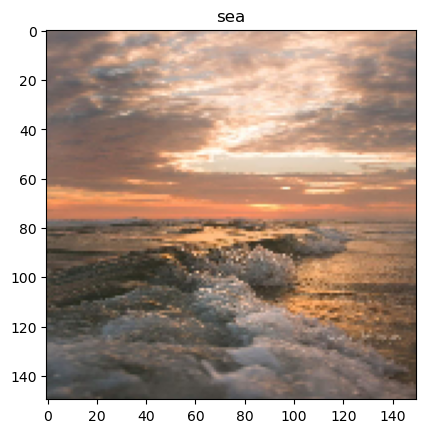

In [54]:
plt.imshow(y_pred)
plt.title(categories[np.argmax(y_prediction)])